In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
import time
%matplotlib inline



In [ ]:
pip install catboost


In [163]:
rain = pd.read_csv('australia_weather.csv', encoding='latin-1')


In [68]:
rain

,Date,Location,Min Temp,Max Temp,Rainfall,Evaporation,Sunshine,WindGust Direction,WindGust Speed,WindDir at 9am,WindDir at 3pm,WindSpeed at 9am,WindSpead at 3pm,Humidity at 9am,Humidity at 3pm,Pressure at 9am,Pressure at 3pm,Cloud at 9am,Cloud at 3pm,Temp at 9am,Temp at 3pm,RainToday,RISK_MM,RainTomorrow,Unnamed: 24,Sou?et - RISK_MM,RainToday.1,Yes,(prázdné),Celkem Výsledek
0,6/7/2012,Adelaide,2.3,14.8,0.0,2.0,NaN,NNW,24.0,NaN,NNW,0.0,13.0,69.0,38.0,1034.6,1030.6,NaN,NaN,7.7,14.4,No,0.0,No,NaN,Location,No,2600.0,227.0,5334.8
1,19/07/2016,Adelaide,8.7,20.2,0.0,NaN,NaN,WSW,19.0,NaN,SW,0.0,9.0,83.0,58.0,1021.7,1019.4,NaN,NaN,11.5,17.9,No,5.0,Yes,NaN,Adelaide,2507.8,3766.6,76.3,7603.0
2,10/6/2015,Adelaide,8.7,13.9,0.0,1.6,NaN,E,30.0,NaN,ESE,0.0,7.0,68.0,45.0,1036.7,1035.0,NaN,NaN,10.5,13.0,No,0.0,No,NaN,Albany,3760.1,2980.2,76.2,6346.0
3,3/3/2012,Adelaide,15.2,27.2,0.0,NaN,8.5,WSW,31.0,NaN,SSW,0.0,9.0,79.0,40.0,1008.0,1006.5,NaN,NaN,18.4,26.1,No,0.2,No,NaN,Albury,3289.6,1727.4,22.0,2952.2
4,28/03/2014,Adelaide,15.9,27.5,0.0,3.8,8.6,W,24.0,NaN,WSW,0.0,13.0,77.0,55.0,1017.2,1015.6,NaN,NaN,18.6,25.1,No,0.0,No,NaN,AliceSprings,1202.8,3693.2,149.8,7062.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,26/09/2009,Woomera,6.6,18.2,0.0,10.6,10.9,SW,70.0,SW,SSW,41.0,31.0,51.0,26.0,1021.4,1020.8,1.0,3.0,11.7,17.1,No,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN
10023,12/1/2013,Woomera,20.6,38.6,0.0,17.8,12.7,SSE,54.0,S,S,43.0,24.0,56.0,11.0,1010.6,1008.6,3.0,2.0,23.6,37.7,No,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN
10024,4/2/2014,Woomera,20.8,38.8,0.0,17.8,11.8,SSE,57.0,SE,SE,44.0,20.0,32.0,9.0,1012.4,1010.3,1.0,5.0,23.5,37.0,No,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN
10025,19/09/2011,Woomera,17.5,23.8,0.0,12.0,11.0,W,70.0,W,W,46.0,44.0,24.0,23.0,1005.8,1007.9,6.0,2.0,23.0,23.1,No,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
columns_to_drop = ['Unnamed: 24', 'RainToday.1', 'Yes', '(prázdné)', 'Celkem Výsledek','RISK_MM','Sou?et - RISK_MM']


rain = rain.drop(columns_to_drop, axis=1)

In [70]:
pd.set_option('display.max_columns', None)


In [71]:
rain

,Date,Location,Min Temp,Max Temp,Rainfall,Evaporation,Sunshine,WindGust Direction,WindGust Speed,WindDir at 9am,WindDir at 3pm,WindSpeed at 9am,WindSpead at 3pm,Humidity at 9am,Humidity at 3pm,Pressure at 9am,Pressure at 3pm,Cloud at 9am,Cloud at 3pm,Temp at 9am,Temp at 3pm,RainToday,RainTomorrow
0,6/7/2012,Adelaide,2.3,14.8,0.0,2.0,NaN,NNW,24.0,NaN,NNW,0.0,13.0,69.0,38.0,1034.6,1030.6,NaN,NaN,7.7,14.4,No,No
1,19/07/2016,Adelaide,8.7,20.2,0.0,NaN,NaN,WSW,19.0,NaN,SW,0.0,9.0,83.0,58.0,1021.7,1019.4,NaN,NaN,11.5,17.9,No,Yes
2,10/6/2015,Adelaide,8.7,13.9,0.0,1.6,NaN,E,30.0,NaN,ESE,0.0,7.0,68.0,45.0,1036.7,1035.0,NaN,NaN,10.5,13.0,No,No
3,3/3/2012,Adelaide,15.2,27.2,0.0,NaN,8.5,WSW,31.0,NaN,SSW,0.0,9.0,79.0,40.0,1008.0,1006.5,NaN,NaN,18.4,26.1,No,No
4,28/03/2014,Adelaide,15.9,27.5,0.0,3.8,8.6,W,24.0,NaN,WSW,0.0,13.0,77.0,55.0,1017.2,1015.6,NaN,NaN,18.6,25.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,26/09/2009,Woomera,6.6,18.2,0.0,10.6,10.9,SW,70.0,SW,SSW,41.0,31.0,51.0,26.0,1021.4,1020.8,1.0,3.0,11.7,17.1,No,No
10023,12/1/2013,Woomera,20.6,38.6,0.0,17.8,12.7,SSE,54.0,S,S,43.0,24.0,56.0,11.0,1010.6,1008.6,3.0,2.0,23.6,37.7,No,No
10024,4/2/2014,Woomera,20.8,38.8,0.0,17.8,11.8,SSE,57.0,SE,SE,44.0,20.0,32.0,9.0,1012.4,1010.3,1.0,5.0,23.5,37.0,No,No
10025,19/09/2011,Woomera,17.5,23.8,0.0,12.0,11.0,W,70.0,W,W,46.0,44.0,24.0,23.0,1005.8,1007.9,6.0,2.0,23.0,23.1,No,No


In [72]:
print(rain.shape)


(10027, 23)


In [73]:
print(rain.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10027 entries, 0 to 10026
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10027 non-null  object 
 1   Location            10027 non-null  object 
 2   Min Temp            9971 non-null   float64
 3   Max Temp            9995 non-null   float64
 4   Rainfall            9941 non-null   float64
 5   Evaporation         5747 non-null   float64
 6   Sunshine            5288 non-null   float64
 7   WindGust Direction  9374 non-null   object 
 8   WindGust Speed      9377 non-null   float64
 9   WindDir at 9am      9337 non-null   object 
 10  WindDir at 3pm      9768 non-null   object 
 11  WindSpeed at 9am    9924 non-null   float64
 12  WindSpead at 3pm    9852 non-null   float64
 13  Humidity at 9am     9902 non-null   float64
 14  Humidity at 3pm     9795 non-null   float64
 15  Pressure at 9am     9080 non-null   float64
 16  Pres

In [74]:
print(rain.describe(exclude=[object]))


          Min Temp     Max Temp     Rainfall  Evaporation     Sunshine  \
count  9971.000000  9995.000000  9941.000000  5747.000000  5288.000000   
mean     12.205536    23.295608     2.428056     5.430833     7.712216   
std       6.369865     7.106884     8.696782     4.089275     3.716090   
min      -8.000000    -3.100000     0.000000     0.000000     0.000000   
25%       7.700000    18.000000     0.000000     2.600000     5.100000   
50%      12.000000    22.700000     0.000000     4.600000     8.500000   
75%      16.900000    28.300000     0.800000     7.200000    10.700000   
max      29.700000    46.800000   210.600000    64.000000    14.100000   

       WindGust Speed  WindSpeed at 9am  WindSpead at 3pm  Humidity at 9am  \
count     9377.000000       9924.000000       9852.000000      9902.000000   
mean        39.940919         13.951028         18.580694        68.911634   
std         13.438265          8.825929          8.762310        18.908413   
min          7.000000

In [75]:
# Define categorical features
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']

# Define numerical features
numerical_features = [column_name for column_name in rain.columns if column_name not in categorical_features]

# Print the summary statistics for numerical features
rain[numerical_features].describe()

,Min Temp,Max Temp,Rainfall,Evaporation,Sunshine,WindGust Speed,WindSpeed at 9am,WindSpead at 3pm,Humidity at 9am,Humidity at 3pm,Pressure at 9am,Pressure at 3pm,Cloud at 9am,Cloud at 3pm,Temp at 9am,Temp at 3pm
count,9971.000000,9995.000000,9941.000000,5747.000000,5288.000000,9377.000000,9924.000000,9852.000000,9902.000000,9795.000000,9080.000000,9083.000000,6243.000000,6033.000000,9953.000000,9846.000000
mean,12.205536,23.295608,2.428056,5.430833,7.712216,39.940919,13.951028,18.580694,68.911634,51.304849,1022.750352,1019.317615,4.426878,4.461296,17.033929,21.770425
std,6.369865,7.106884,8.696782,4.089275,3.716090,13.438265,8.825929,8.762310,18.908413,20.615354,215.462928,191.346068,2.881716,2.709560,6.469895,6.927418
min,-8.000000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,982.900000,983.200000,0.000000,0.000000,-5.500000,-3.900000
25%,7.700000,18.000000,0.000000,2.600000,5.100000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.000000,1010.500000,1.000000,2.000000,12.400000,16.700000
50%,12.000000,22.700000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.200000
75%,16.900000,28.300000,0.800000,7.200000,10.700000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.425000,1020.100000,7.000000,7.000000,21.600000,26.400000
max,29.700000,46.800000,210.600000,64.000000,14.100000,109.000000,63.000000,65.000000,100.000000,100.000000,10250.000000,10155.000000,8.000000,8.000000,39.000000,45.800000


In [76]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGust Direction', 'WindDir at 9am', 'WindDir at 3pm', 'RainToday', 'RainTomorrow']


In [77]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)


Number of Numerical Features: 16
Numerical Features:  ['Min Temp', 'Max Temp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGust Speed', 'WindSpeed at 9am', 'WindSpead at 3pm', 'Humidity at 9am', 'Humidity at 3pm', 'Pressure at 9am', 'Pressure at 3pm', 'Cloud at 9am', 'Cloud at 3pm', 'Temp at 9am', 'Temp at 3pm']


In [78]:
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3046
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGust Direction are: 17
Cardinality(no. of unique values) of WindDir at 9am are: 17
Cardinality(no. of unique values) of WindDir at 3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [79]:
rain['Date'] = pd.to_datetime(rain['Date'], dayfirst=True)
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day


In [80]:
rain.drop('Date', axis = 1, inplace = True)
rain.head()

,Location,Min Temp,Max Temp,Rainfall,Evaporation,Sunshine,WindGust Direction,WindGust Speed,WindDir at 9am,WindDir at 3pm,WindSpeed at 9am,WindSpead at 3pm,Humidity at 9am,Humidity at 3pm,Pressure at 9am,Pressure at 3pm,Cloud at 9am,Cloud at 3pm,Temp at 9am,Temp at 3pm,RainToday,RainTomorrow,year,month,day
0,Adelaide,2.3,14.8,0.0,2.0,NaN,NNW,24.0,NaN,NNW,0.0,13.0,69.0,38.0,1034.6,1030.6,NaN,NaN,7.7,14.4,No,No,2012,7,6
1,Adelaide,8.7,20.2,0.0,NaN,NaN,WSW,19.0,NaN,SW,0.0,9.0,83.0,58.0,1021.7,1019.4,NaN,NaN,11.5,17.9,No,Yes,2016,7,19
2,Adelaide,8.7,13.9,0.0,1.6,NaN,E,30.0,NaN,ESE,0.0,7.0,68.0,45.0,1036.7,1035.0,NaN,NaN,10.5,13.0,No,No,2015,6,10
3,Adelaide,15.2,27.2,0.0,NaN,8.5,WSW,31.0,NaN,SSW,0.0,9.0,79.0,40.0,1008.0,1006.5,NaN,NaN,18.4,26.1,No,No,2012,3,3
4,Adelaide,15.9,27.5,0.0,3.8,8.6,W,24.0,NaN,WSW,0.0,13.0,77.0,55.0,1017.2,1015.6,NaN,NaN,18.6,25.1,No,No,2014,3,28


In [89]:
categorical_features = ['Location', 'WindGust Direction', 'WindDir at 9am', 'WindDir at 3pm', 'RainToday', 'RainTomorrow']
missing_values = rain[categorical_features].isnull().sum()
print(missing_values)


Location                0
WindGust Direction    653
WindDir at 9am        690
WindDir at 3pm        259
RainToday              87
RainTomorrow            1
dtype: int64


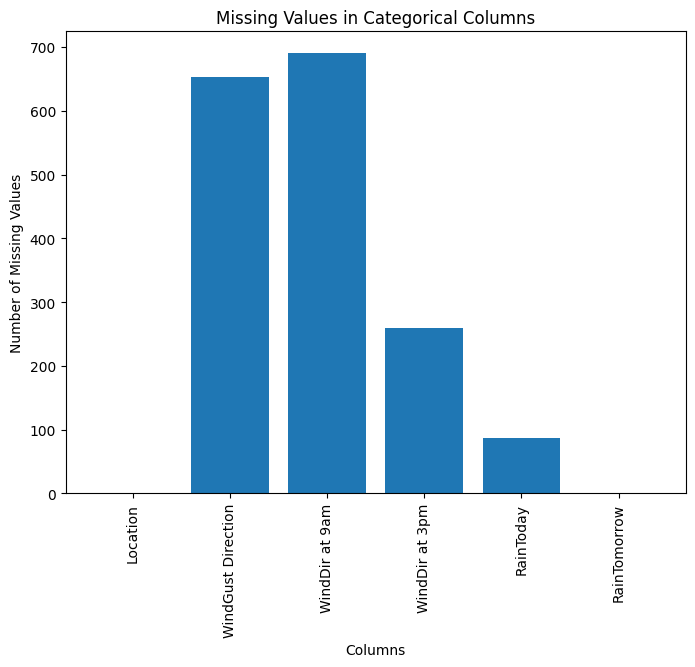

In [90]:
import pandas as pd

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
missing_values = rain[categorical_features].isnull().sum()

# Create a bar plot of missing values
plt.figure(figsize=(8, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Categorical Columns')
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [137]:
rain.corr()


,Location,Min Temp,Max Temp,Rainfall,Evaporation,Sunshine,WindGust Direction,WindGust Speed,WindDir at 9am,WindDir at 3pm,WindSpeed at 9am,WindSpead at 3pm,Humidity at 9am,Humidity at 3pm,Pressure at 9am,Pressure at 3pm,Cloud at 9am,Cloud at 3pm,Temp at 9am,Temp at 3pm,RainToday,RainTomorrow,year,month,day
Location,1.000000,-0.008765,-0.028008,-0.004803,0.021406,-0.001873,0.030740,0.083724,0.007191,0.024713,0.087357,0.080820,-0.015578,0.007878,0.028142,0.039972,-0.004361,-0.021632,-0.013739,-0.027926,-0.005110,-0.010481,0.008404,0.007343,0.001262
Min Temp,-0.008765,1.000000,0.736309,0.060462,0.402996,0.068421,0.040620,0.168960,-0.035670,0.083528,0.167541,0.172595,-0.227517,0.005143,-0.429494,-0.438371,0.054764,0.007036,0.898744,0.703758,0.061091,0.076422,0.050034,-0.207635,0.002140
Max Temp,-0.028008,0.736309,1.000000,-0.247561,0.502475,0.333641,0.049577,0.072817,-0.215720,0.075101,0.009053,0.045136,-0.489001,-0.494099,-0.326770,-0.414831,-0.219898,-0.216870,0.880902,0.971481,-0.221944,-0.155692,0.064867,-0.179268,0.011054
Rainfall,-0.004803,0.060462,-0.247561,1.000000,-0.190713,-0.254880,-0.015672,0.129323,0.185211,-0.046391,0.097780,0.078364,0.381441,0.396944,-0.179281,-0.095713,0.268217,0.242184,-0.109870,-0.250049,0.966739,0.319613,-0.011986,0.016503,-0.002482
Evaporation,0.021406,0.402996,0.502475,-0.190713,1.000000,0.347412,0.037413,0.161292,-0.094322,0.045491,0.154555,0.092629,-0.421004,-0.322478,-0.238579,-0.262389,-0.175816,-0.172036,0.475313,0.486190,-0.168473,-0.100479,0.065743,-0.043529,-0.011690
Sunshine,-0.001873,0.068421,0.333641,-0.254880,0.347412,1.000000,0.005107,-0.000694,-0.072415,-0.003050,0.009333,0.050562,-0.345502,-0.438296,0.007622,-0.037673,-0.539148,-0.558150,0.219339,0.350193,-0.235250,-0.309432,0.005268,0.014437,0.015498
WindGust Direction,0.030740,0.040620,0.049577,-0.015672,0.037413,0.005107,1.000000,-0.017126,-0.018216,0.119256,0.016913,0.004960,-0.002174,0.003223,0.007819,-0.001971,0.005253,0.000281,0.045221,0.047330,-0.014597,0.002444,0.005308,-0.013141,-0.009392
WindGust Speed,0.083724,0.168960,0.072817,0.129323,0.161292,-0.000694,-0.017126,1.000000,0.065847,-0.028647,0.572646,0.664017,-0.220623,-0.044632,-0.418742,-0.380561,0.046578,0.061710,0.144313,0.036856,0.125766,0.214022,-0.015442,0.069038,-0.020815
WindDir at 9am,0.007191,-0.035670,-0.215720,0.185211,-0.094322,-0.072415,-0.018216,0.065847,1.000000,-0.079496,0.115314,0.117411,0.085747,0.140038,-0.038039,0.052338,0.082439,0.048609,-0.122020,-0.225463,0.167620,0.027450,0.003253,0.016367,-0.012763
WindDir at 3pm,0.024713,0.083528,0.075101,-0.046391,0.045491,-0.003050,0.119256,-0.028647,-0.079496,1.000000,0.027196,-0.016795,-0.011011,0.016590,0.071236,0.034215,-0.000064,-0.014578,0.083243,0.080862,-0.043814,-0.012073,-0.006872,-0.027840,-0.009404


In [91]:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)
    

In [92]:
rain[numerical_features].isnull().sum()


Min Temp              56
Max Temp              32
Rainfall              86
Evaporation         4280
Sunshine            4739
WindGust Speed       650
WindSpeed at 9am     103
WindSpead at 3pm     175
Humidity at 9am      125
Humidity at 3pm      232
Pressure at 9am      947
Pressure at 3pm      944
Cloud at 9am        3784
Cloud at 3pm        3994
Temp at 9am           74
Temp at 3pm          181
dtype: int64

In [96]:
numerical_features = ['Min Temp', 'Max Temp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGust Speed', 'WindSpeed at 9am', 'WindSpead at 3pm',
                      'Humidity at 9am', 'Humidity at 3pm', 'Pressure at 9am',
                      'Pressure at 3pm', 'Cloud at 9am', 'Cloud at 3pm',
                      'Temp at 9am', 'Temp at 3pm','year','month','day']

missing_values = rain[numerical_features].isnull().sum()
print(missing_values)



Min Temp              56
Max Temp              32
Rainfall              86
Evaporation         4280
Sunshine            4739
WindGust Speed       650
WindSpeed at 9am     103
WindSpead at 3pm     175
Humidity at 9am      125
Humidity at 3pm      232
Pressure at 9am      947
Pressure at 3pm      944
Cloud at 9am        3784
Cloud at 3pm        3994
Temp at 9am           74
Temp at 3pm          181
year                   0
month                  0
day                    0
dtype: int64


In [97]:
features_with_outliers = ['Min Temp', 'Max Temp', 'Rainfall', 'Evaporation', 'WindGust Speed','WindSpeed at 9am', 'WindSpead at 3pm', 'Humidity at 9am', 'Pressure at 9am', 'Pressure at 3pm', 'Temp at 9am', 'Temp at 3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

In [98]:
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

<Axes: xlabel='RainTomorrow'>

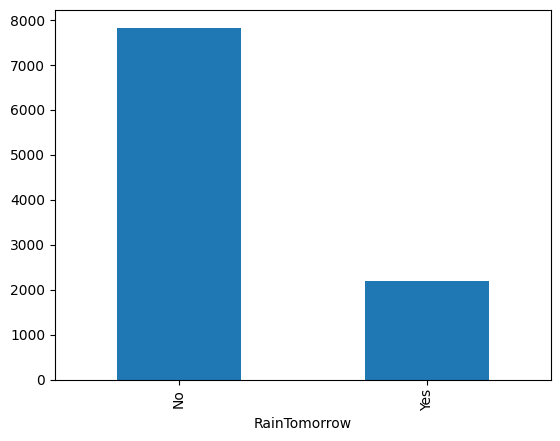

In [99]:
rain['RainTomorrow'].value_counts().plot(kind='bar')


<Axes: xlabel='Sunshine', ylabel='Rainfall'>

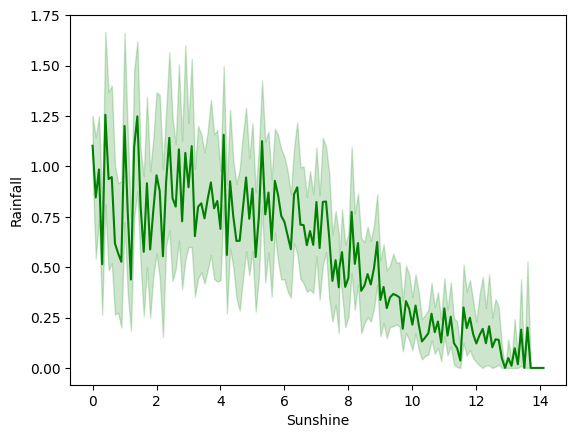

In [100]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='green')

<Axes: xlabel='Sunshine', ylabel='Evaporation'>

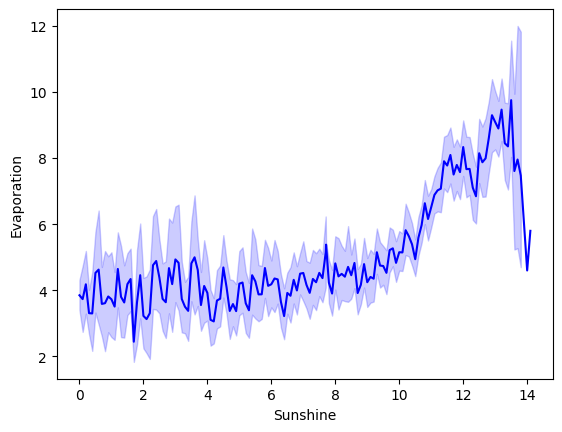

In [101]:
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',color='blue')


<Axes: >

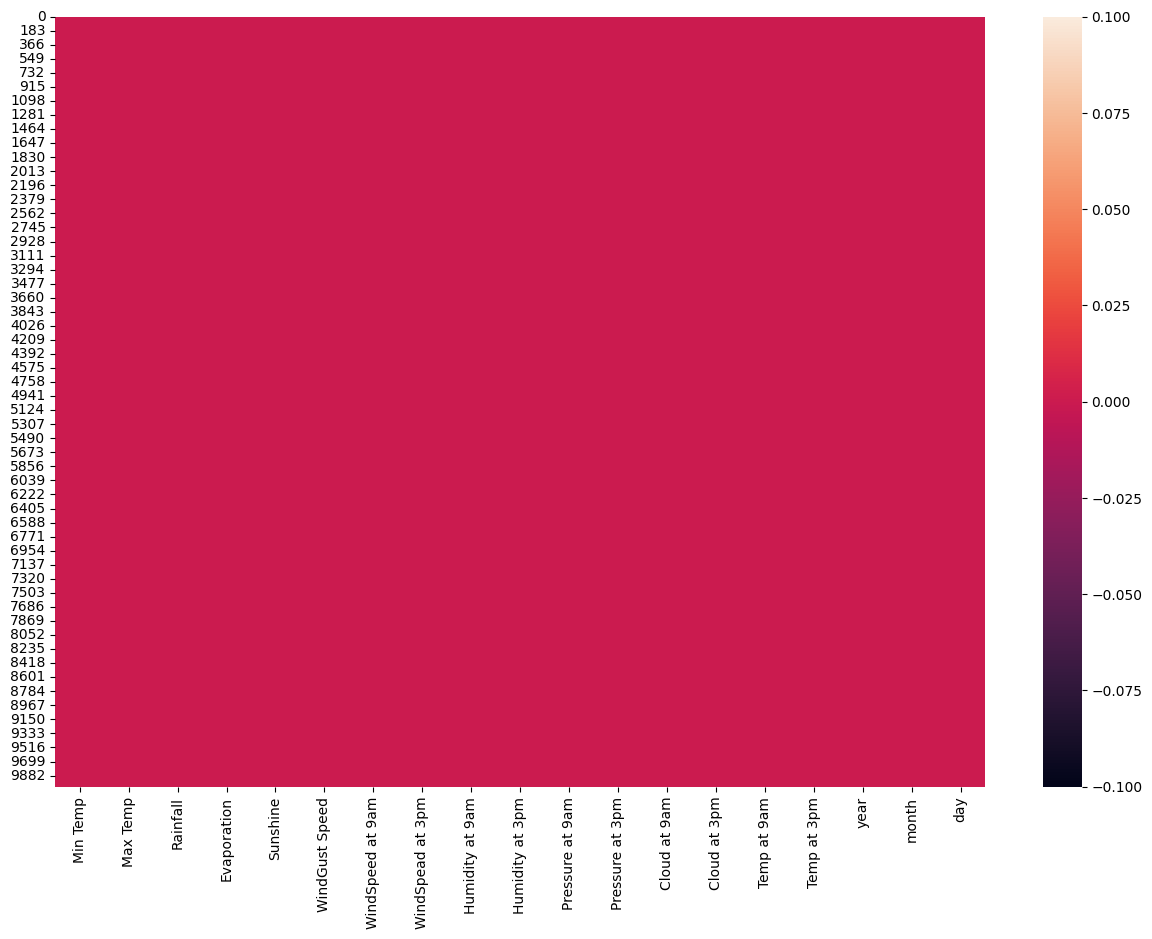

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(rain[numerical_features].isnull(),linecolor='white')


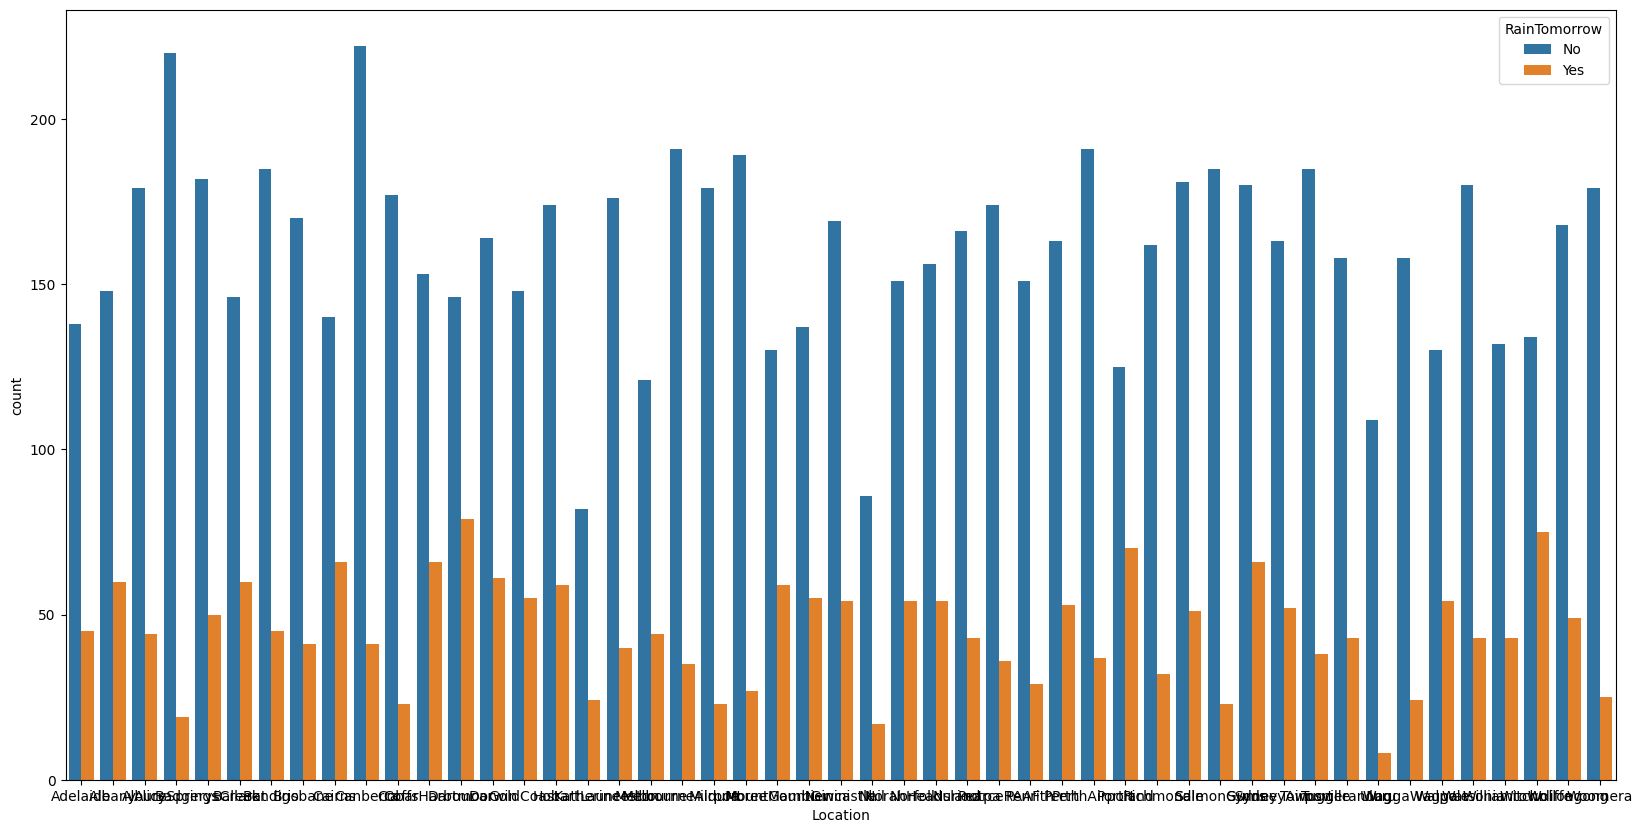

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain)

array([[<Axes: title={'center': 'Min Temp'}>,
        <Axes: title={'center': 'Max Temp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'WindGust Speed'}>,
        <Axes: title={'center': 'WindSpeed at 9am'}>,
        <Axes: title={'center': 'WindSpead at 3pm'}>,
        <Axes: title={'center': 'Humidity at 9am'}>],
       [<Axes: title={'center': 'Pressure at 9am'}>,
        <Axes: title={'center': 'Pressure at 3pm'}>,
        <Axes: title={'center': 'Temp at 9am'}>,
        <Axes: title={'center': 'Temp at 3pm'}>],
       [<Axes: title={'center': 'Cloud at 9am'}>,
        <Axes: title={'center': 'Cloud at 3pm'}>, <Axes: >, <Axes: >]],
      dtype=object)

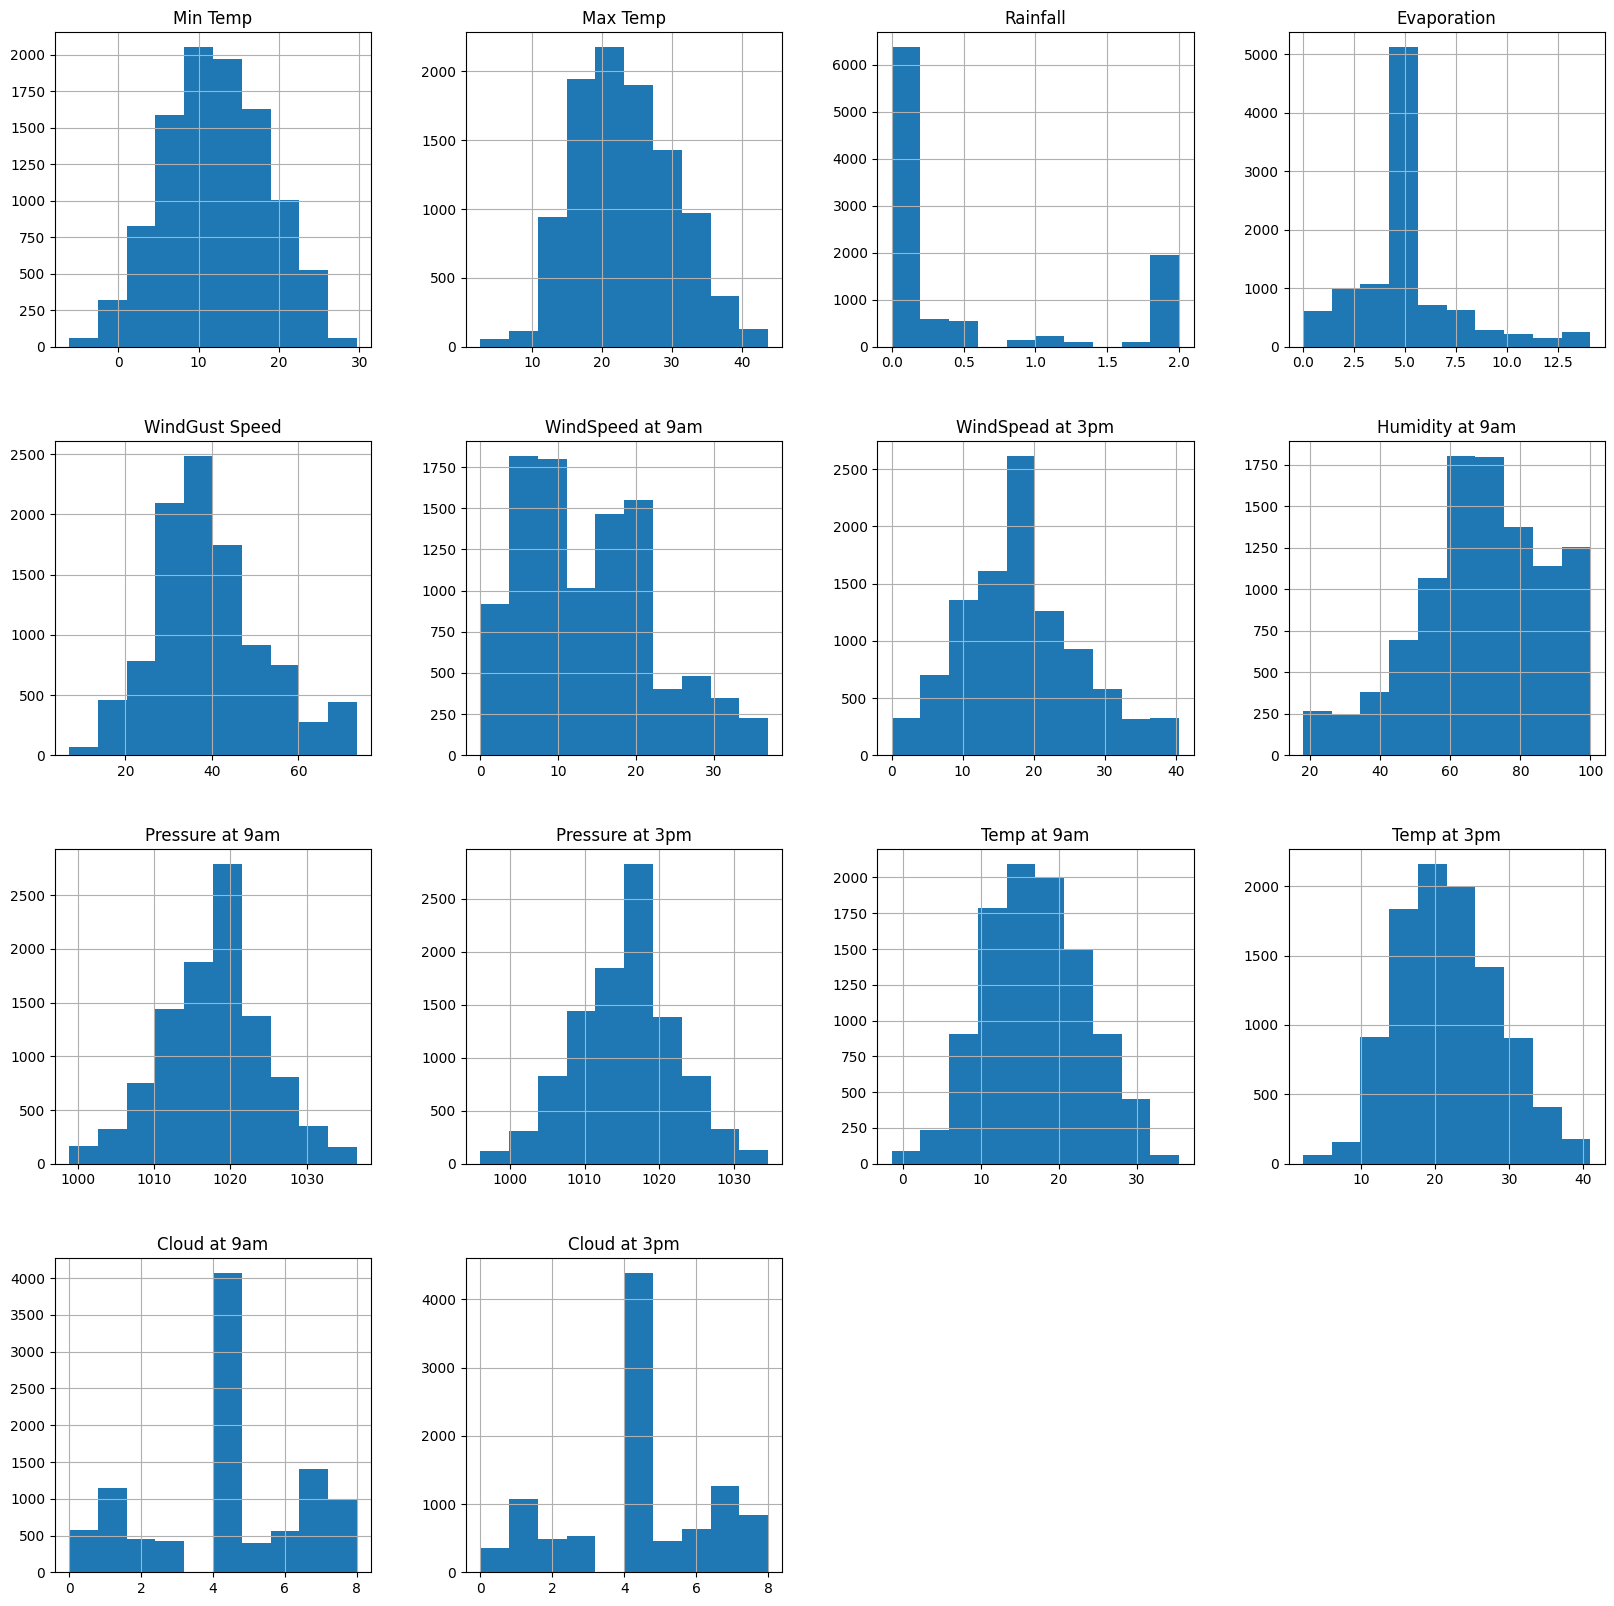

In [33]:
num_features = ['Min Temp', 'Max Temp', 'Rainfall', 'Evaporation', 'WindGust Speed','WindSpeed at 9am', 'WindSpead at 3pm', 'Humidity at 9am', 'Pressure at 9am', 'Pressure at 3pm', 'Temp at 9am', 'Temp at 3pm','Cloud at 9am','Cloud at 3pm']
rain[num_features].hist(bins=10,figsize=(20,20))

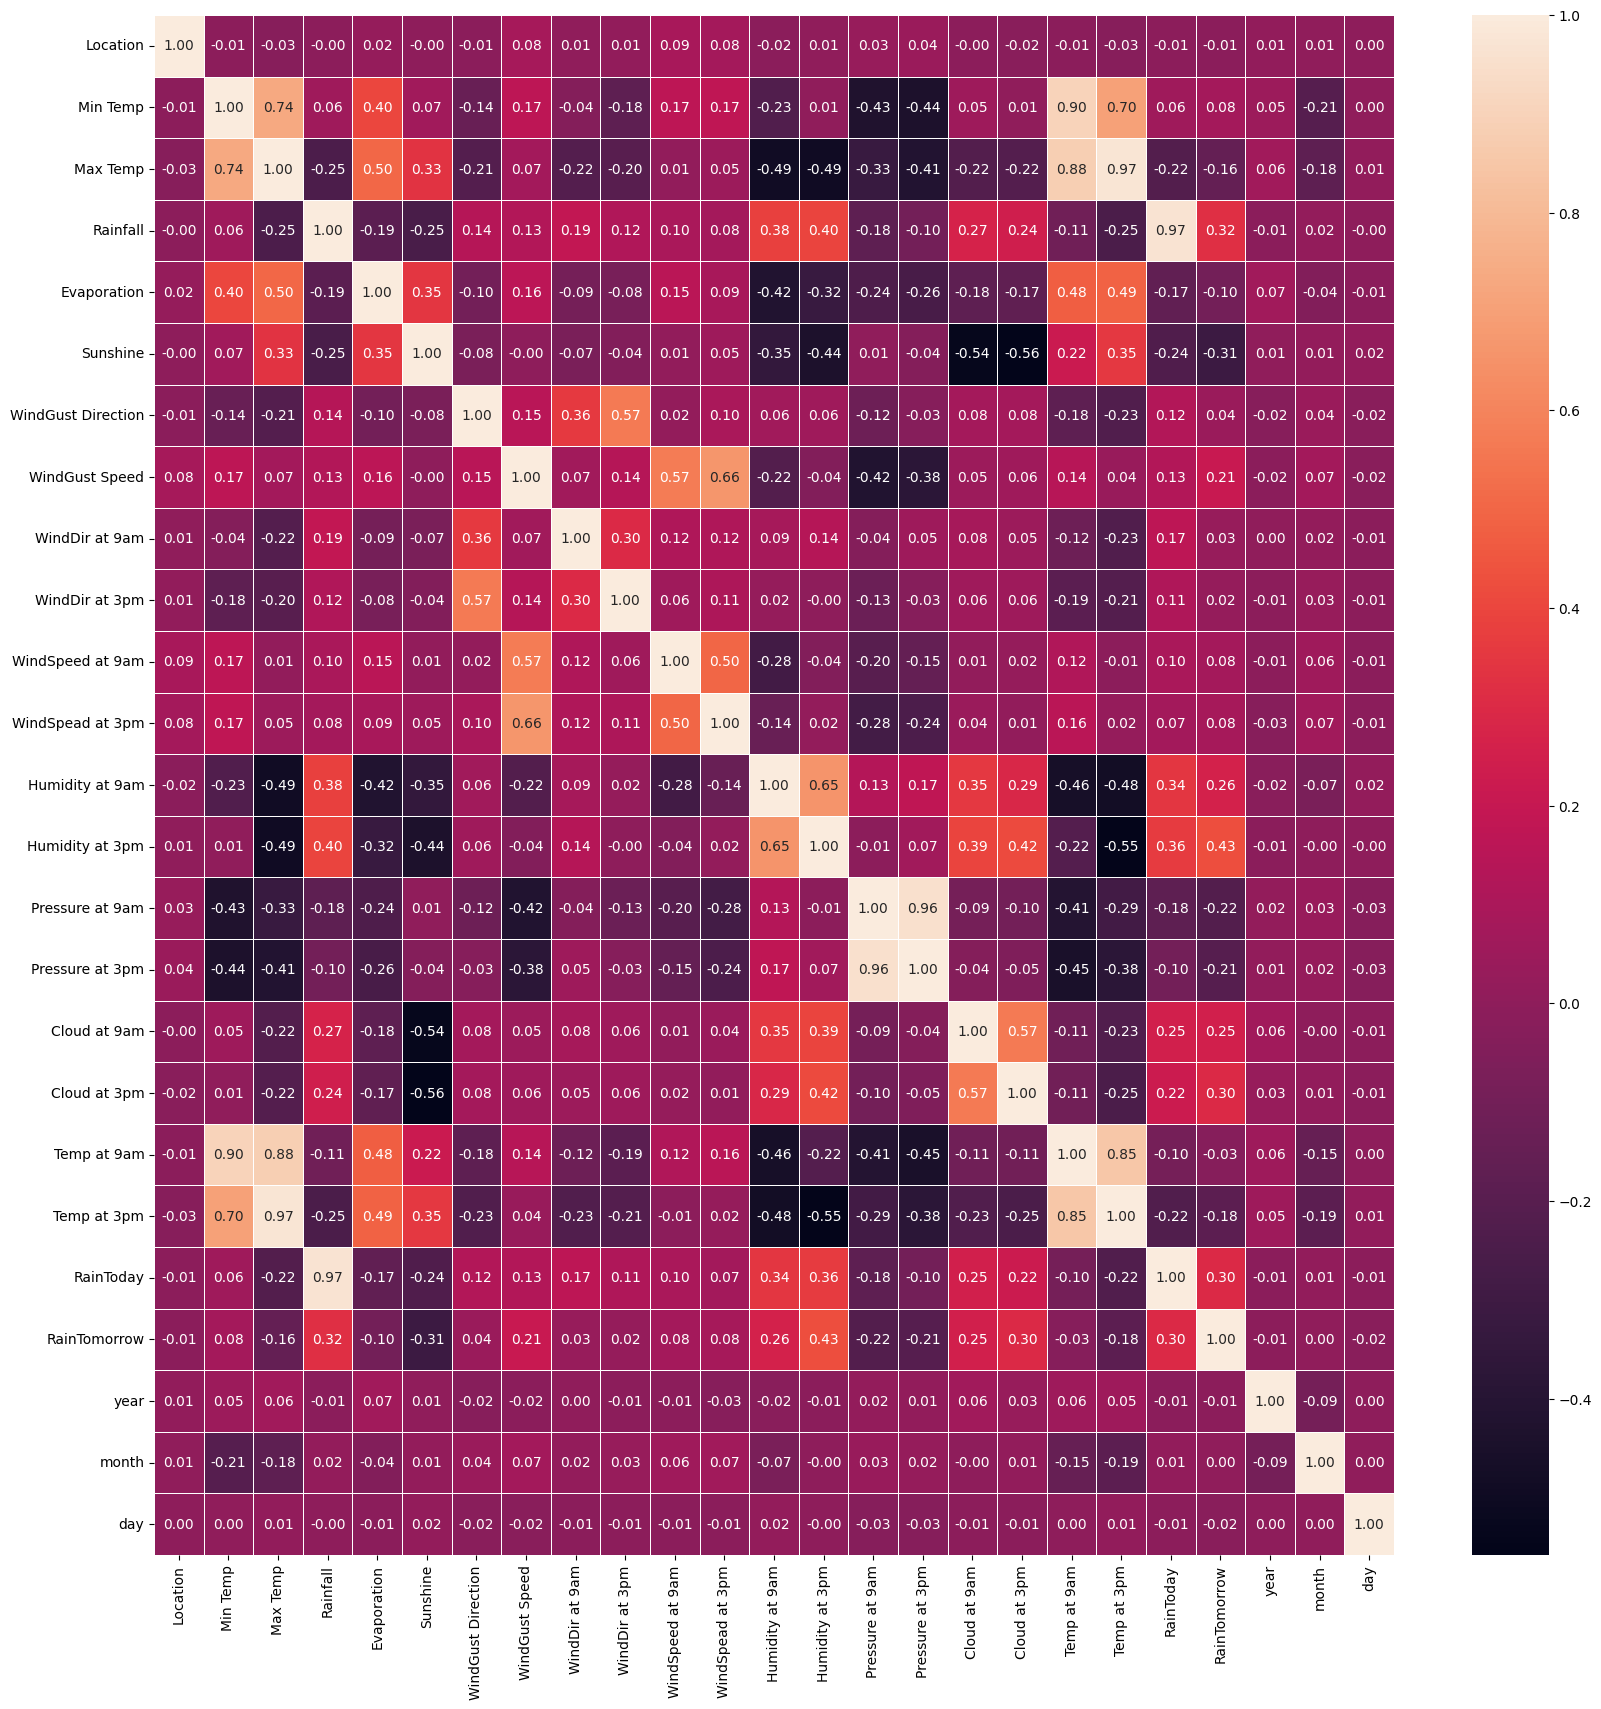

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Select categorical features
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']

# Convert categorical features to numeric using label encoding
label_encoder = LabelEncoder()
for feature in categorical_features:
    rain[feature] = label_encoder.fit_transform(rain[feature].astype(str))

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(rain.corr(), linewidths=0.5, annot=True, fmt=".2f")
plt.show()


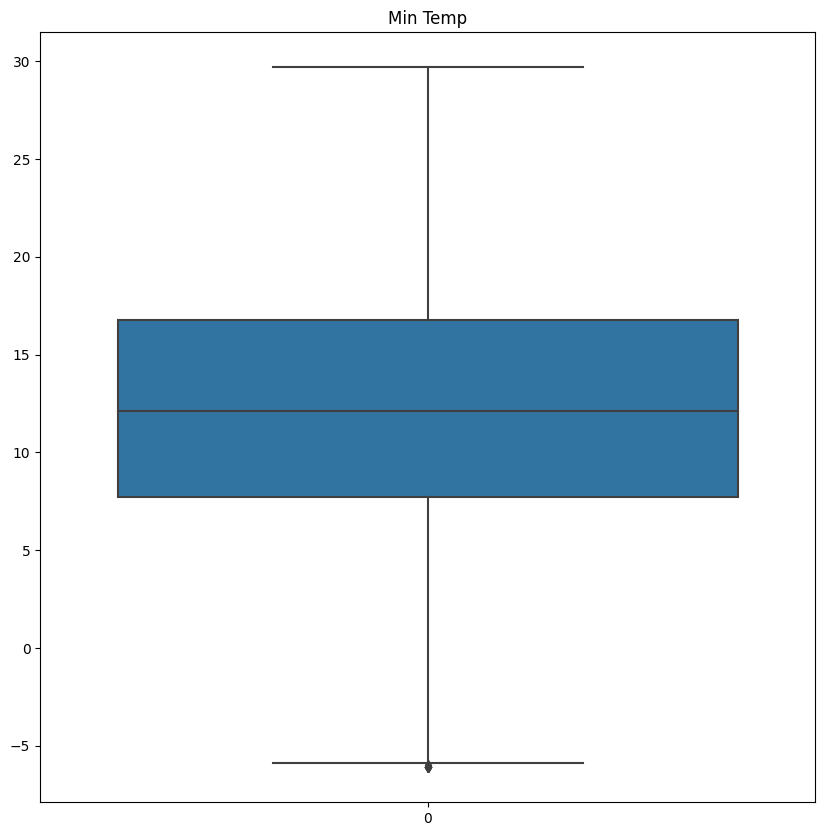

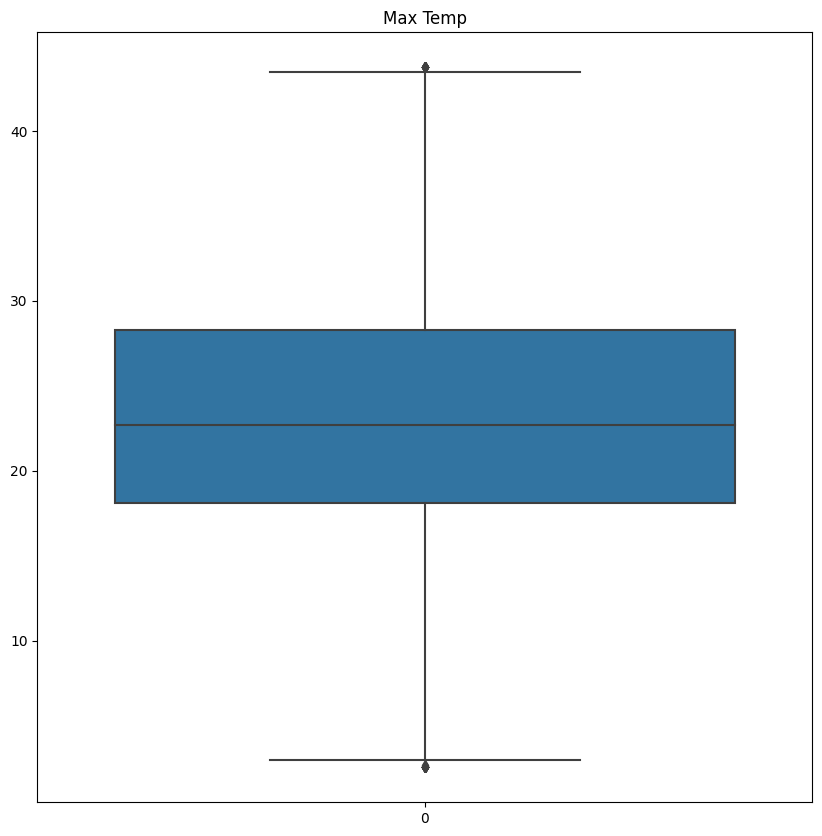

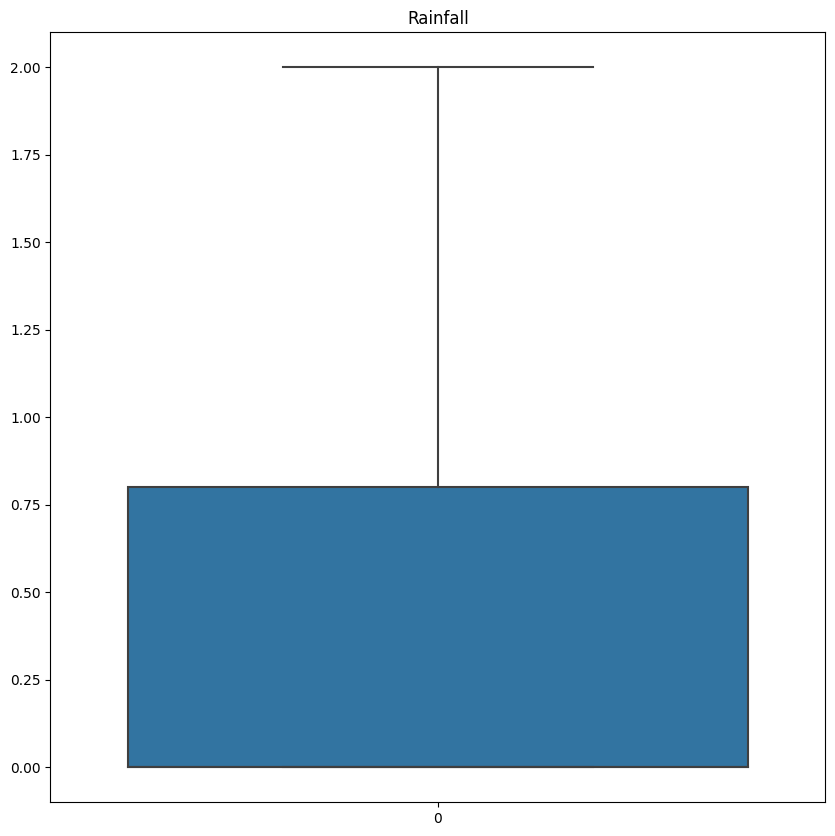

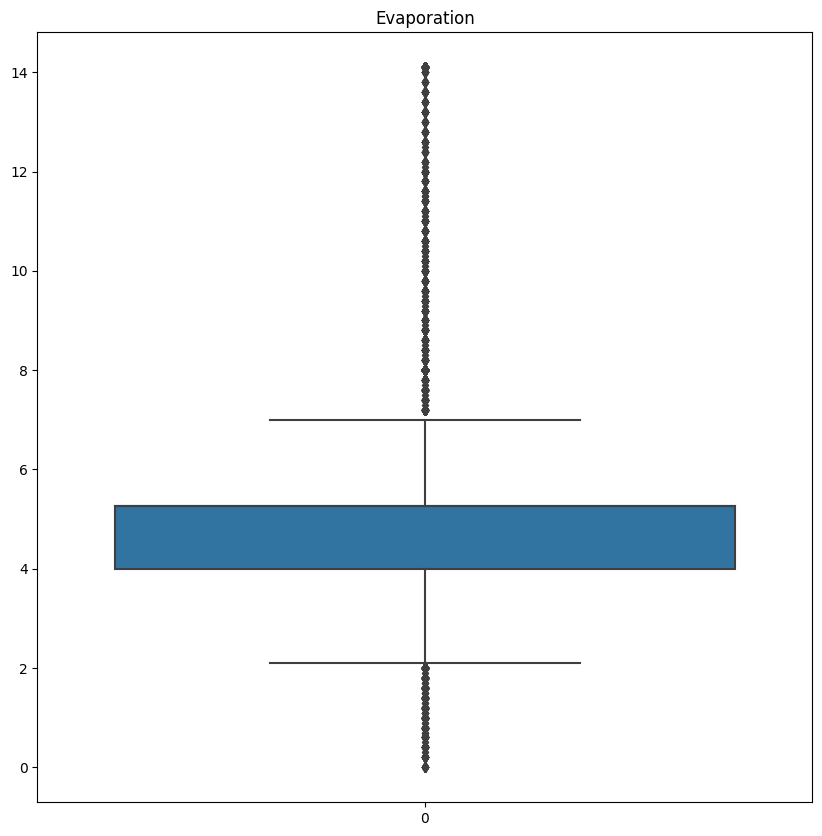

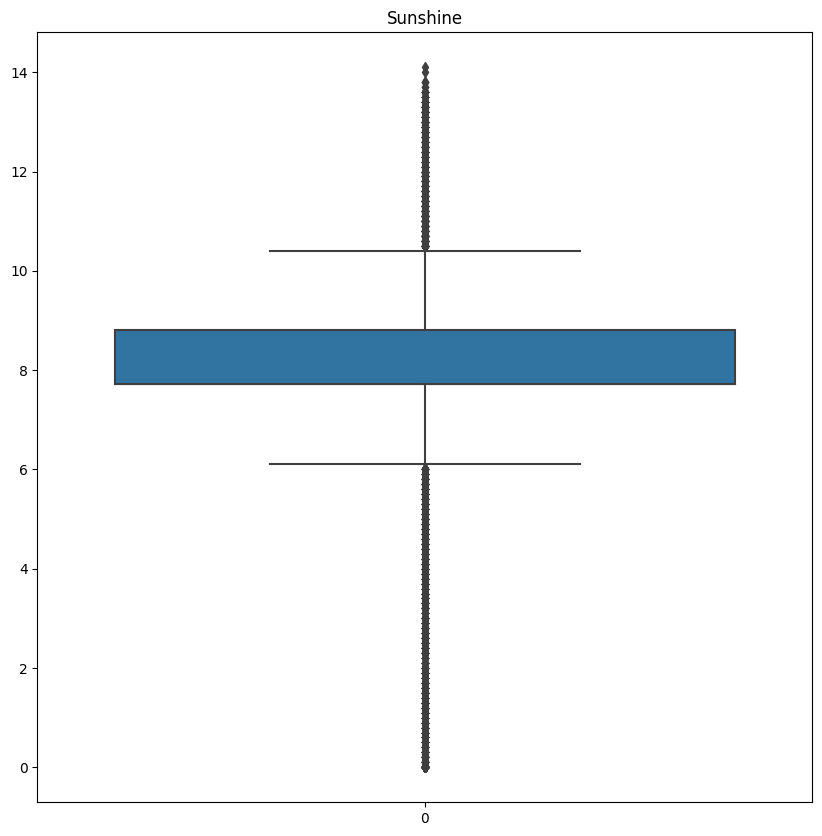

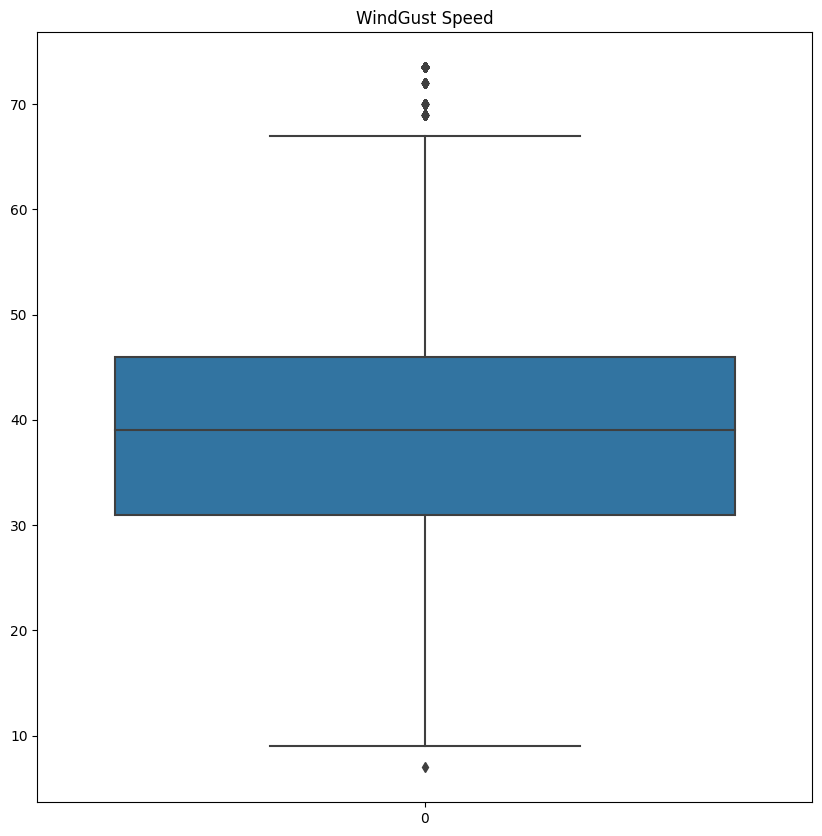

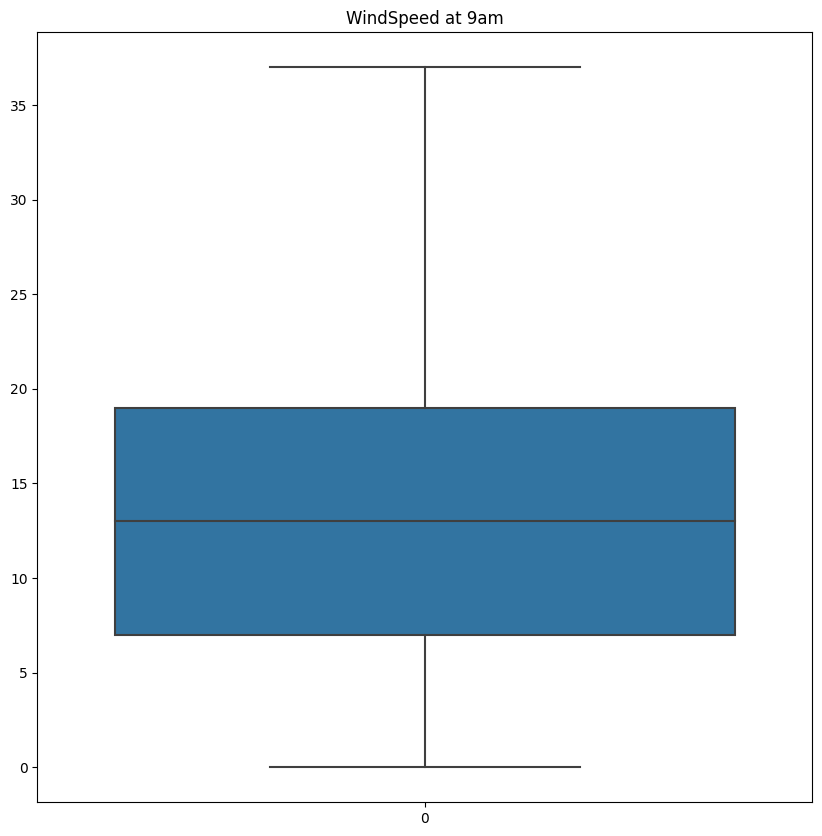

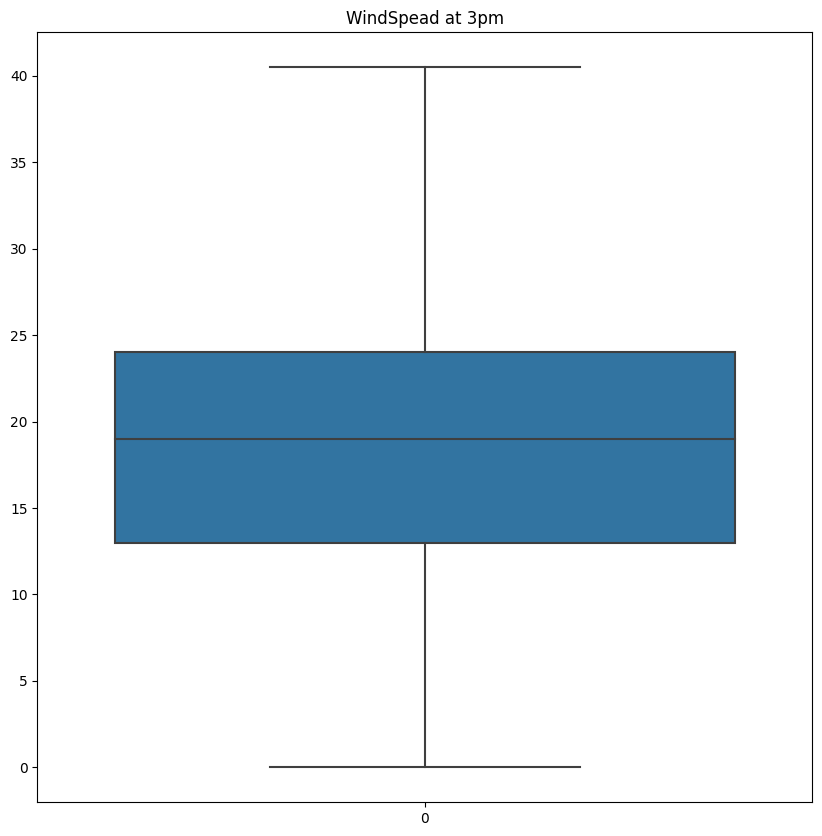

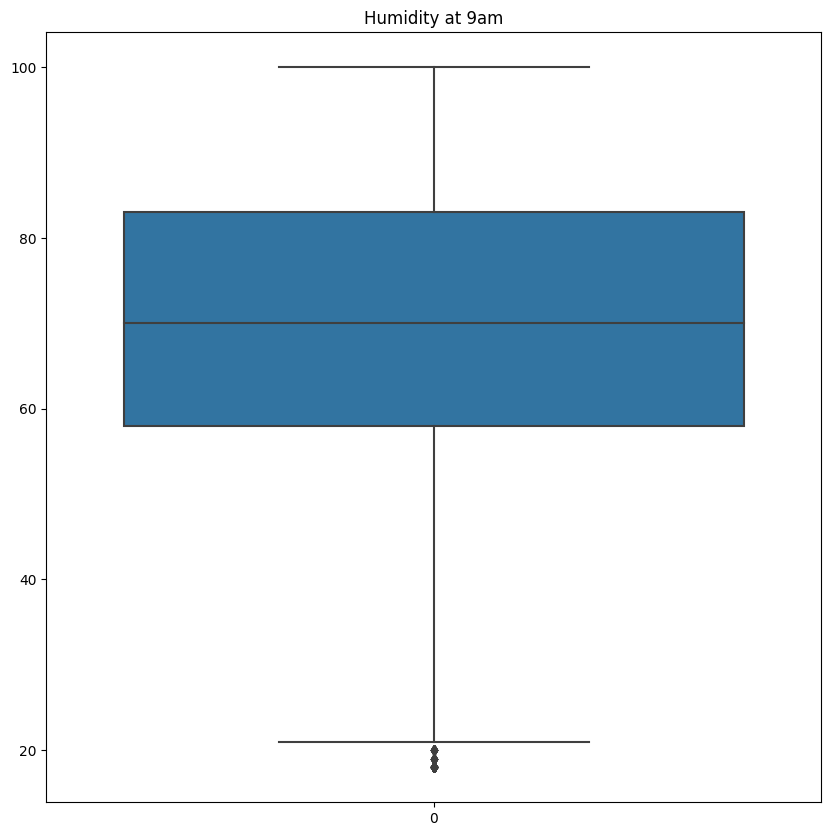

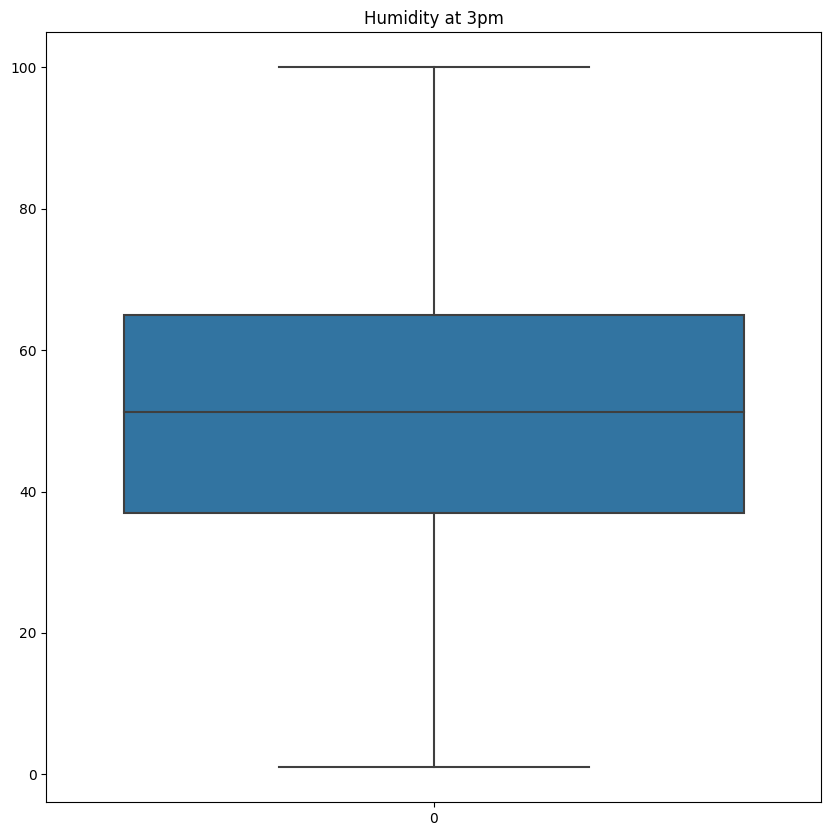

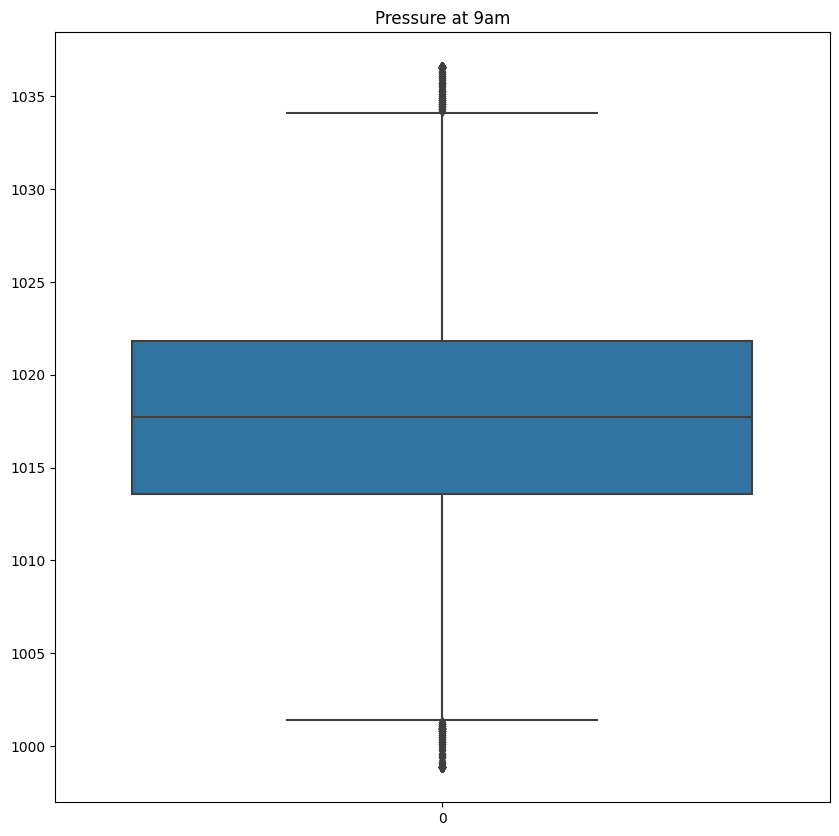

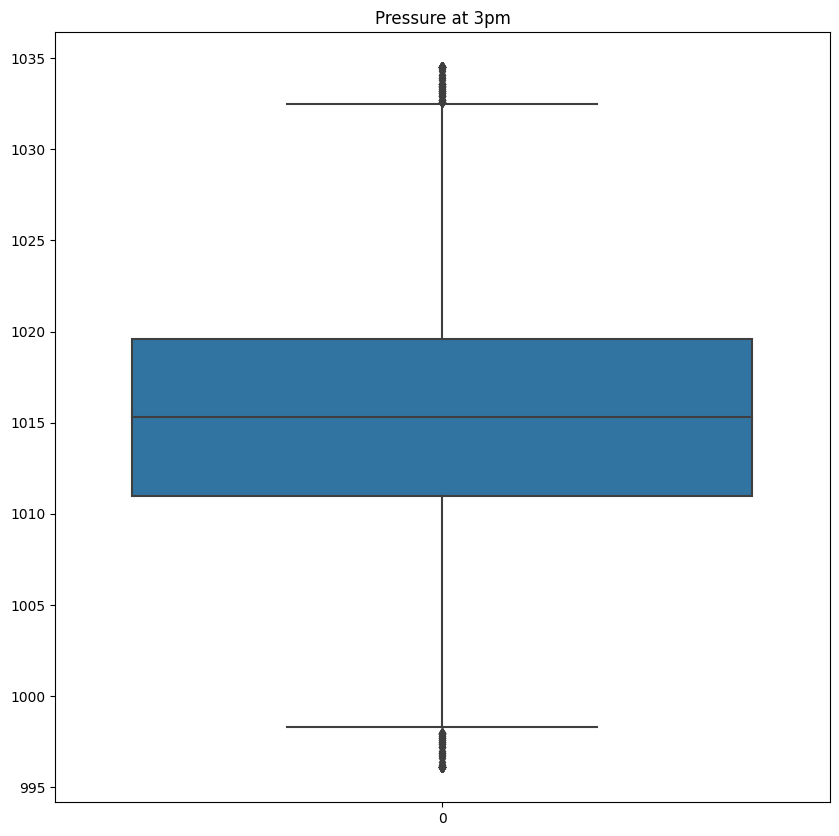

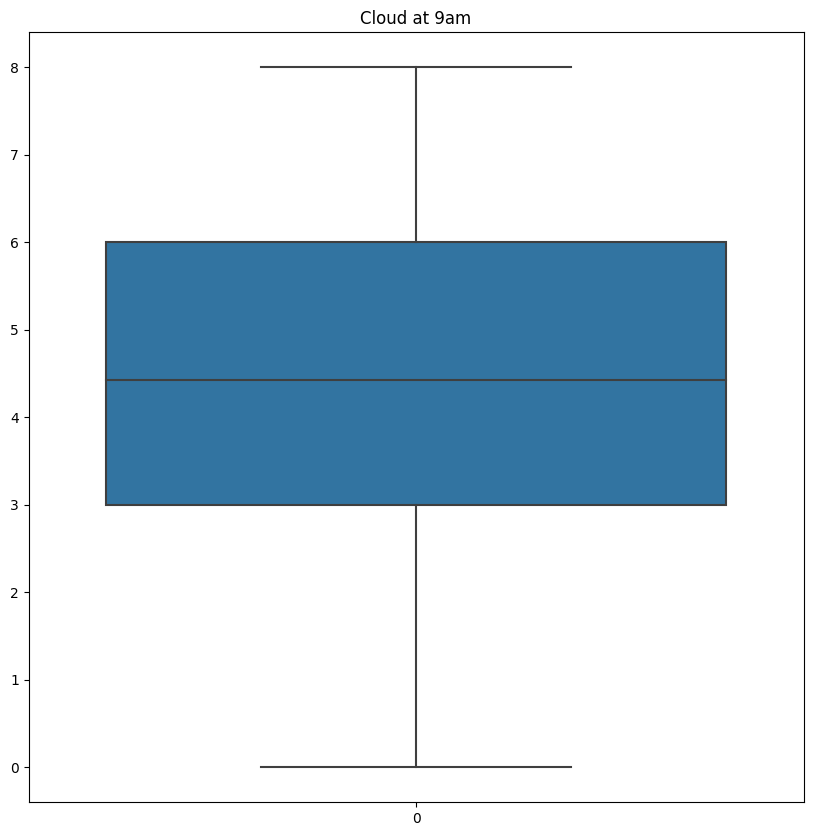

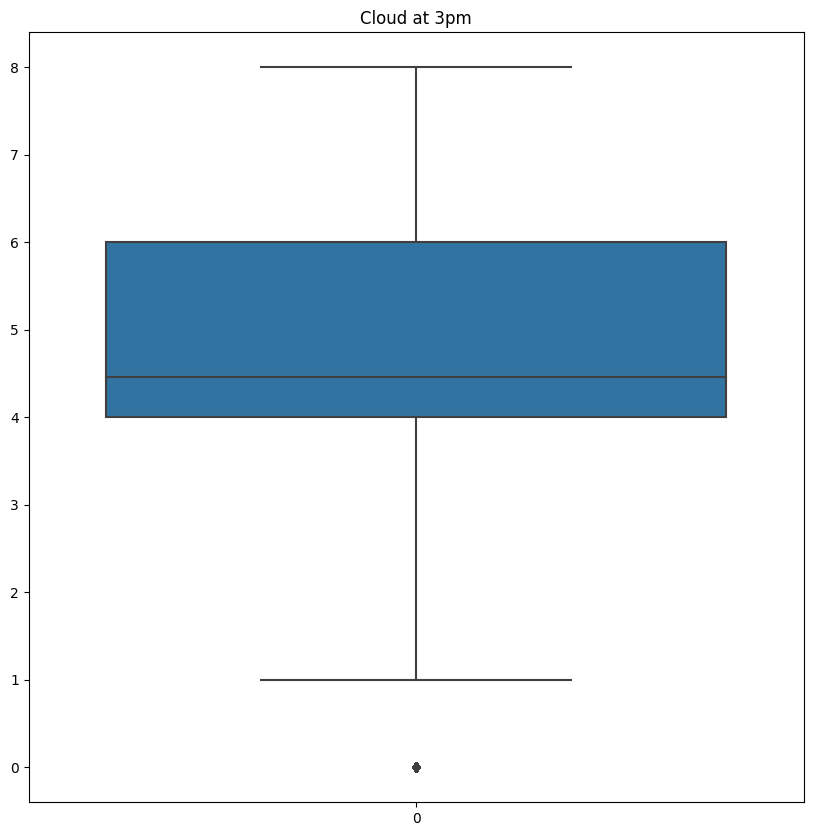

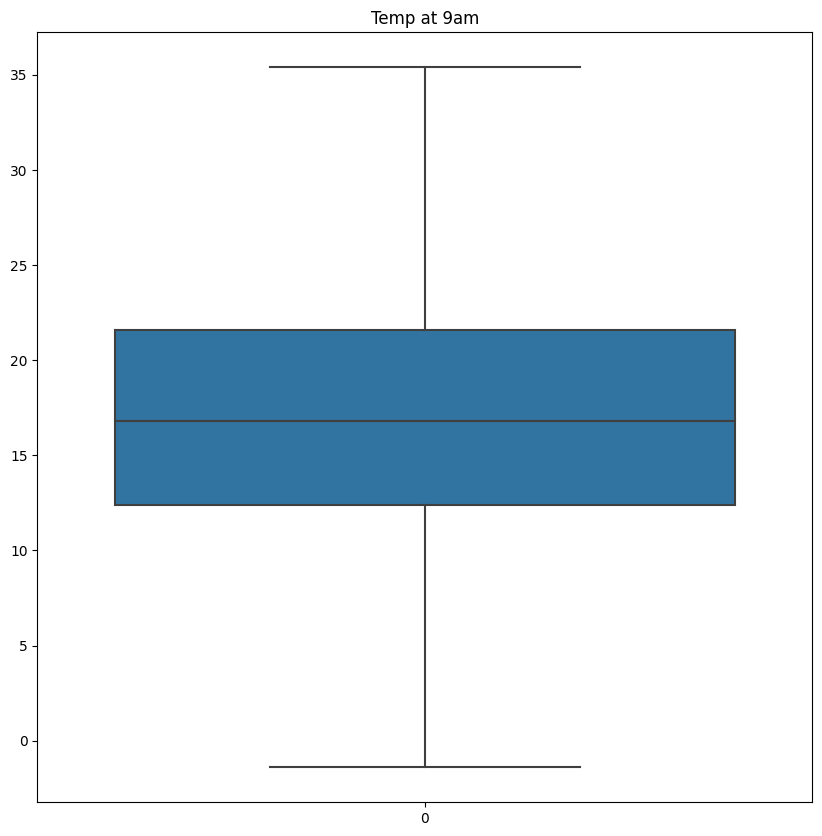

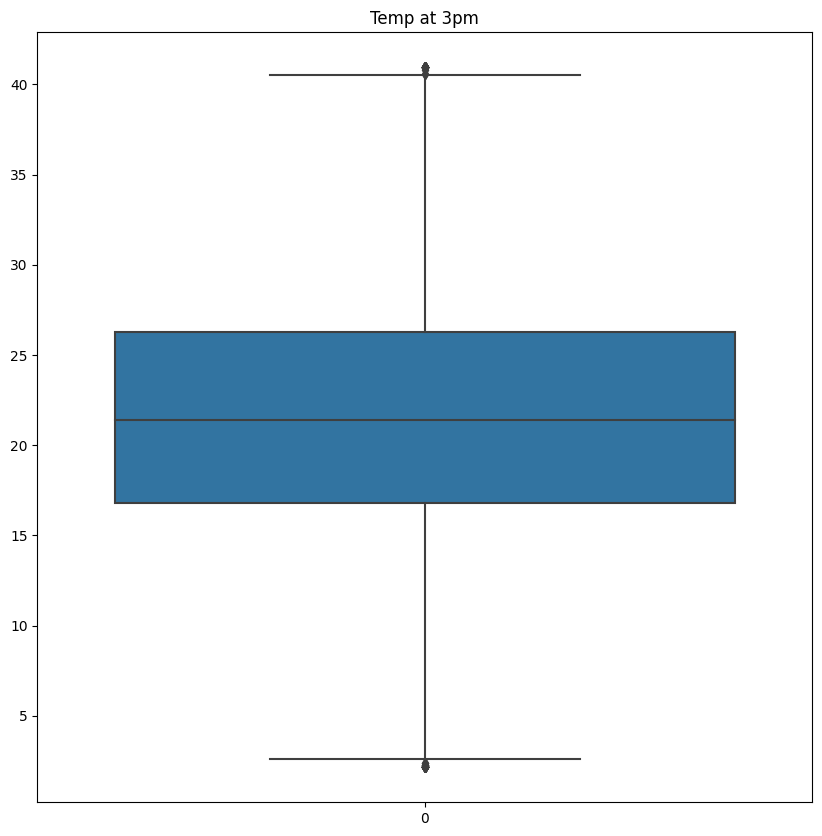

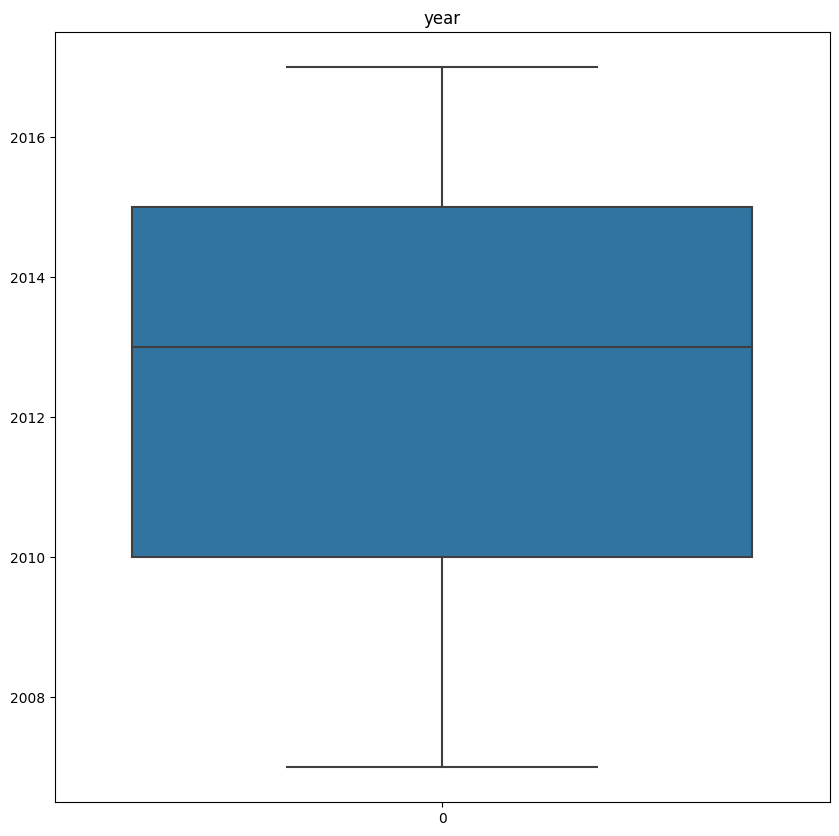

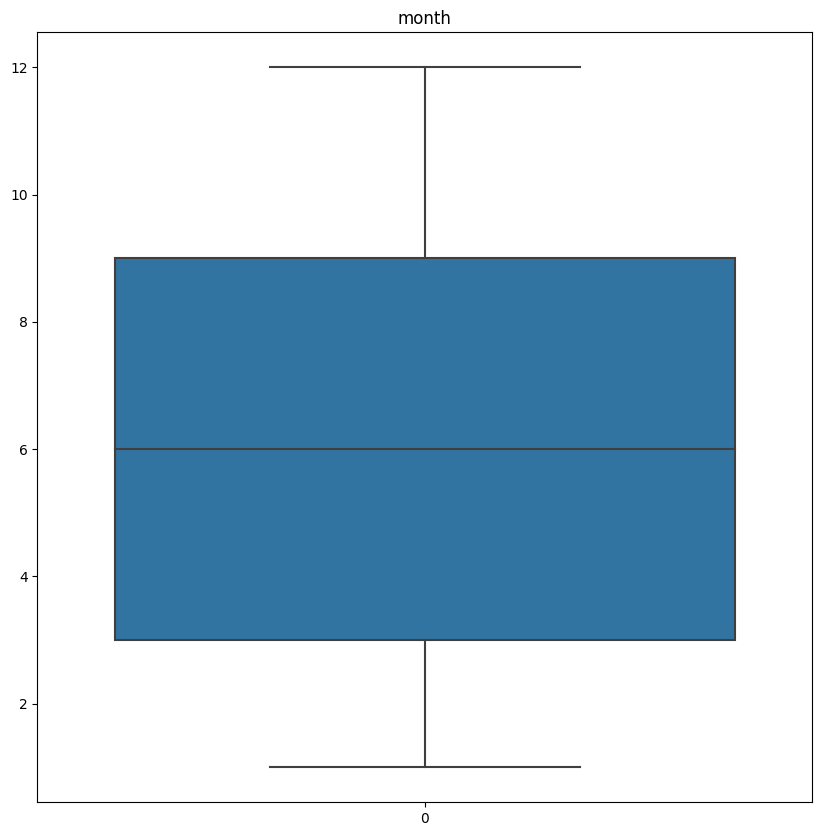

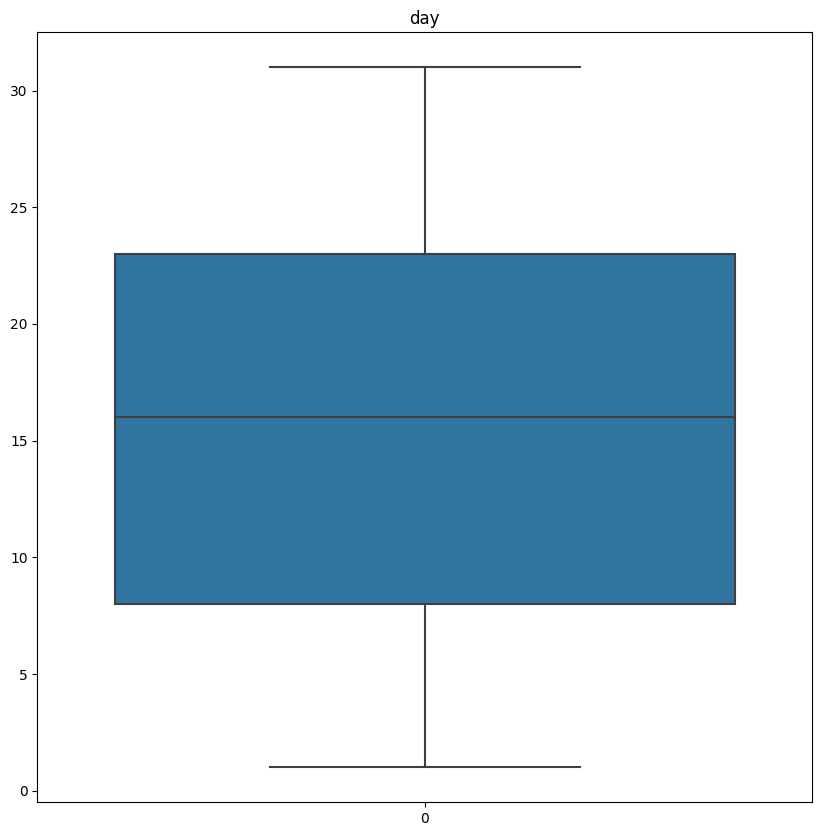

In [110]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)

In [113]:
categorical_features


['Location',
 'WindGust Direction',
 'WindDir at 9am',
 'WindDir at 3pm',
 'RainToday',
 'RainTomorrow']

In [114]:
# Encoding Categorical Features using replace function:

rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

# pd.get_dummies(rain['RainToday'],drop_first = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [115]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [120]:
rain['WindGust Direction'].replace(encode_data('WindGust Direction'),inplace = True)


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}


In [124]:
rain['WindDir at 3pm'].replace(encode_data('WindDir at 3pm'),inplace = True)


{6: 0, 12: 1, 2: 2, 11: 3, 15: 4, 1: 5, 14: 6, 9: 7, 13: 8, 7: 9, 3: 10, 4: 11, 8: 12, 5: 13, 10: 14, 0: 15}


In [125]:
rain['Location'].replace(encode_data('Location'), inplace = True)


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48}


In [ ]:
Spliting data into input features and label

In [112]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

In [ ]:
Spliting data into input features and label



In [126]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

In [127]:
# finding feature importance using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [128]:
etr_model.feature_importances_


array([0.03186534, 0.02995767, 0.02740002, 0.05816743, 0.02516419,
       0.04300278, 0.0312613 , 0.05642384, 0.0346588 , 0.03051936,
       0.03130631, 0.03225765, 0.03619316, 0.20046304, 0.03536178,
       0.0492632 , 0.02544607, 0.03819812, 0.02718136, 0.02723346,
       0.0333287 , 0.03144868, 0.03019021, 0.03370751])

<Axes: >

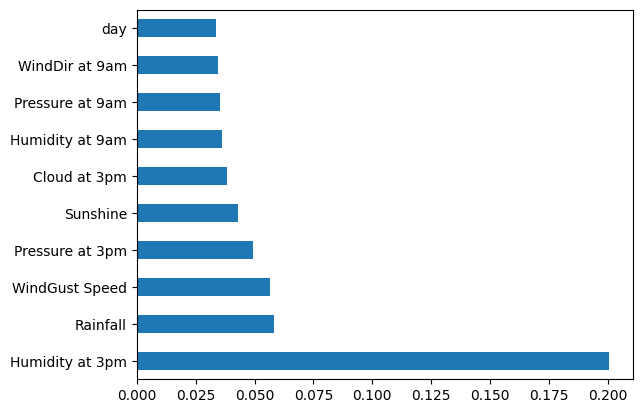

In [129]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [130]:
feature_imp


Location              0.031865
Min Temp              0.029958
Max Temp              0.027400
Rainfall              0.058167
Evaporation           0.025164
Sunshine              0.043003
WindGust Direction    0.031261
WindGust Speed        0.056424
WindDir at 9am        0.034659
WindDir at 3pm        0.030519
WindSpeed at 9am      0.031306
WindSpead at 3pm      0.032258
Humidity at 9am       0.036193
Humidity at 3pm       0.200463
Pressure at 9am       0.035362
Pressure at 3pm       0.049263
Cloud at 9am          0.025446
Cloud at 3pm          0.038198
Temp at 9am           0.027181
Temp at 3pm           0.027233
RainToday             0.033329
year                  0.031449
month                 0.030190
day                   0.033708
dtype: float64

In [ ]:
5) Split Data into Training and Testing Set

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [133]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 8021
Length of Testing Data: 2006


In [ ]:
6) Feature Scaling

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [135]:
X_test = scaler.transform(X_test)


In [139]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
7) Model Building
- Model Training
- Model Testing 
- Evaluating Model Performance using Accuracy, Confusion Matrix, Classification Report, RUC-AUC curve
- Finding whether model performance can be improved using Cross Validation Score

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [142]:
(i) Logistic Regression

Model Training:



SyntaxError: invalid syntax (1980821509.py, line 1)

In [143]:
from sklearn.linear_model import LogisticRegression


In [146]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [147]:
print("Time Taken to train: {}".format(end_time - start_time))


Time Taken to train: 0.06113600730895996


In [ ]:
Model Testing:



In [148]:
y_pred = classifier_logreg.predict(X_test)


In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [150]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score: 0.8384845463609173


In [ ]:
Checking for Overfitting and Under Fitting:



In [151]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8417903004612891
Test Data Score: 0.8384845463609173


In [ ]:
Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.

In [152]:
# confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[1469  101]
 [ 223  213]]


In [153]:
# Classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1570
           1       0.68      0.49      0.57       436

    accuracy                           0.84      2006
   macro avg       0.77      0.71      0.73      2006
weighted avg       0.83      0.84      0.83      2006



In [154]:
# predicting probabilities:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [155]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

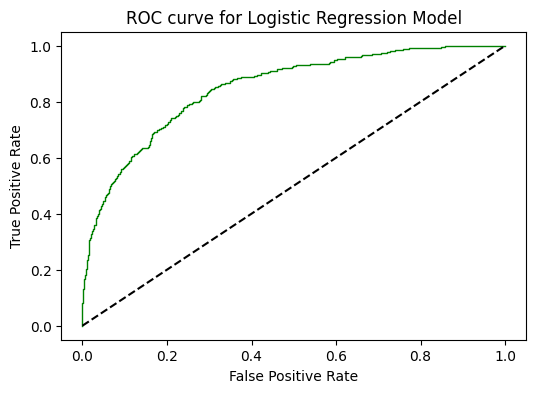

In [156]:
# Plotting ROC curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [157]:
# finding ROC-AUC score:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7121004499503301


In [ ]:
Finding whether model performance can be improved using Cross Validation Score:



In [158]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.83115265 0.84850374 0.83478803 0.84413965 0.84164589]


In [159]:
print('Average cross-validation score: {}'.format(scores.mean()))


Average cross-validation score: 0.840045990941649


In [ ]:
The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation.



In [165]:
from catboost import CatBoostClassifier


In [170]:
print(cat_classifier)


In [168]:
start_time = time.time()
cat_classifier = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat_classifier.fit(X_train, y_train)
end_time = time.time()

Learning rate set to 0.013274
0:	total: 5.9ms	remaining: 11.8s
1:	total: 11ms	remaining: 11s
2:	total: 16ms	remaining: 10.6s
3:	total: 21ms	remaining: 10.5s
4:	total: 26.1ms	remaining: 10.4s
5:	total: 30.7ms	remaining: 10.2s
6:	total: 35.7ms	remaining: 10.2s
7:	total: 40.4ms	remaining: 10.1s
8:	total: 45.6ms	remaining: 10.1s
9:	total: 50.9ms	remaining: 10.1s
10:	total: 56.6ms	remaining: 10.2s
11:	total: 61.5ms	remaining: 10.2s
12:	total: 66.6ms	remaining: 10.2s
13:	total: 71.4ms	remaining: 10.1s
14:	total: 76.4ms	remaining: 10.1s
15:	total: 81.3ms	remaining: 10.1s
16:	total: 86.4ms	remaining: 10.1s
17:	total: 91.4ms	remaining: 10.1s
18:	total: 96.8ms	remaining: 10.1s
19:	total: 102ms	remaining: 10.1s
20:	total: 108ms	remaining: 10.2s
21:	total: 113ms	remaining: 10.2s
22:	total: 119ms	remaining: 10.2s
23:	total: 124ms	remaining: 10.2s
24:	total: 130ms	remaining: 10.2s
25:	total: 135ms	remaining: 10.2s
26:	total: 140ms	remaining: 10.2s
27:	total: 145ms	remaining: 10.2s
28:	total: 150ms	r

In [169]:
print("Training Time:", end_time - start_time, "seconds")


Training Time: 12.24721884727478 seconds


In [ ]:
Model Testing:



In [171]:
y_pred_cat = cat_classifier.predict(X_test)


In [172]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_cat)))


Accuracy Score: 0.8454636091724825


In [173]:
Checking for Overfitting and Under Fitting:



SyntaxError: invalid syntax (4183598172.py, line 1)

In [174]:
print("Train Data Score: {}".format(cat_classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(cat_classifier.score(X_test, y_test)))

Train Data Score: 0.946515397082658
Test Data Score: 0.8454636091724825


In [ ]:
Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.



In [175]:
# Confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_cat))

Confusion Matrix:

 [[1478   92]
 [ 218  218]]


In [176]:
# classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred_cat))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1570
           1       0.70      0.50      0.58       436

    accuracy                           0.85      2006
   macro avg       0.79      0.72      0.74      2006
weighted avg       0.83      0.85      0.84      2006



In [177]:
# predicting the probabilities:

y_pred_cat_proba = cat_classifier.predict_proba(X_test)

In [178]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve  

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat_proba[:,1])

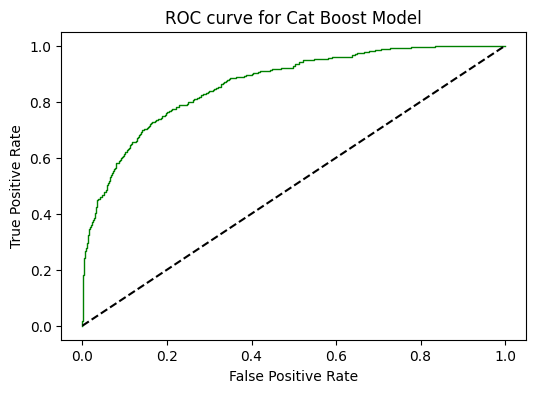

In [179]:
# plotting ROC Curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Cat Boost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [180]:
#finding ROC AUC Scores:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_cat)))

ROC AUC Scores: 0.7207006369426752


In [ ]:
Finding whether model performance can be improved using Cross Validation Score:



In [181]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Learning rate set to 0.012067
0:	total: 4.52ms	remaining: 9.04s
1:	total: 9.18ms	remaining: 9.17s
2:	total: 13.7ms	remaining: 9.12s
3:	total: 18.2ms	remaining: 9.09s
4:	total: 22.8ms	remaining: 9.11s
5:	total: 27ms	remaining: 8.96s
6:	total: 31.1ms	remaining: 8.86s
7:	total: 35.3ms	remaining: 8.78s
8:	total: 39.3ms	remaining: 8.7s
9:	total: 43.4ms	remaining: 8.63s
10:	total: 47.3ms	remaining: 8.55s
11:	total: 51.7ms	remaining: 8.57s
12:	total: 55.9ms	remaining: 8.55s
13:	total: 60ms	remaining: 8.52s
14:	total: 64.3ms	remaining: 8.51s
15:	total: 68.5ms	remaining: 8.49s
16:	total: 72.8ms	remaining: 8.49s
17:	total: 76.9ms	remaining: 8.47s
18:	total: 81ms	remaining: 8.44s
19:	total: 85.2ms	remaining: 8.43s
20:	total: 89.4ms	remaining: 8.42s
21:	total: 93.6ms	remaining: 8.41s
22:	total: 98.3ms	remaining: 8.45s
23:	total: 103ms	remaining: 8.46s
24:	total: 107ms	remaining: 8.47s
25:	total: 112ms	remaining: 8.47s
26:	total: 116ms	remaining: 8.46s
27:	total: 120ms	remaining: 8.47s
28:	total: 1

In [182]:
print('Average cross-validation score: {}'.format(scores.mean()))


Average cross-validation score: 0.8417905392282533


In [ ]:
The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8647050735597415. So, accuracy of model may not be improved using Cross-validation.



In [ ]:
(iii) Random Forest



In [183]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
Model Training:



In [188]:
start_time = time.time()
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)
end_time = time.time()

In [189]:
print("Time Taken to train: {}".format(end_time - start_time))


Time Taken to train: 1.5727207660675049


In [ ]:
Model Testing:



In [190]:
y_pred_rf = classifier_rf.predict(X_test)


In [191]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))


Accuracy Score: 0.8479561316051845


In [ ]:
Checking for Overfitting and Under Fitting:



In [192]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 1.0
Test Data Score: 0.8479561316051845


In [ ]:
Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.

In [ ]:
9) Saving Classifier Object into Pickle File:


In [193]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)

In [194]:
with open('catboostclassifier.pkl', 'wb') as file:
    pickle.dump(cat_classifier, file)